In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import date

In [2]:
import bt
import ffn
%matplotlib inline

## Import Data

In [3]:
price1=pd.read_excel("price_data.xlsx", sheet_name="Price Series")
price1=price1.set_index('PriceDate')                                #sets the PriceDate column as the index 
price1

,US Treasury Bonds,US Inflation-Linked Bonds,Global Equity,Commodities,Gold,US High Yield Bonds,Emerging Market Sovereign Debt,Cash,LIBOR
PriceDate,,,,,,,,,
1998-12-31,983.50,106.1116,92.1840,136.3798,77.5773,536.47,88.052,349.4840,5.0656
1999-01-01,983.50,106.1116,92.1840,136.3798,77.5773,536.47,88.052,349.4840,5.0656
1999-01-04,982.38,105.6175,93.1440,136.9924,77.4047,536.88,89.451,349.6425,5.0603
1999-01-05,979.96,105.5680,94.0910,136.5933,77.3081,537.14,90.668,349.6979,5.0603
1999-01-06,982.35,106.3848,95.8840,138.5323,77.5296,537.63,90.909,349.7490,5.0603
...,...,...,...,...,...,...,...,...,...
2022-12-26,2200.70,329.5350,317.7814,642.2183,427.8410,2206.64,517.100,535.4438,4.7264
2022-12-27,2187.85,328.5899,317.4097,647.0357,432.5279,2202.30,515.099,535.6728,4.7264
2022-12-28,2184.57,328.2543,314.6942,643.4645,430.8486,2186.17,515.003,535.7443,4.7298


In [4]:
# pct_change(): calculate returns
return1=price1.pct_change().dropna()
return1['LIBOR']=(price1['LIBOR']/100)/252   # convert annaulized financing rate to daily rate
return1

,US Treasury Bonds,US Inflation-Linked Bonds,Global Equity,Commodities,Gold,US High Yield Bonds,Emerging Market Sovereign Debt,Cash,LIBOR
PriceDate,,,,,,,,,
1999-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000201
1999-01-04,-0.001139,-0.004656,0.010414,0.004492,-0.002225,0.000764,0.015888,0.000454,0.000201
1999-01-05,-0.002463,-0.000469,0.010167,-0.002913,-0.001248,0.000484,0.013605,0.000158,0.000201
1999-01-06,0.002439,0.007737,0.019056,0.014195,0.002865,0.000912,0.002658,0.000146,0.000201
1999-01-07,-0.002871,0.000680,-0.002649,-0.000721,0.013456,0.000670,-0.019338,0.000168,0.000201
...,...,...,...,...,...,...,...,...,...
2022-12-26,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188
2022-12-27,-0.005839,-0.002868,-0.001170,0.007501,0.010955,-0.001967,-0.003870,0.000428,0.000188
2022-12-28,-0.001499,-0.001021,-0.008555,-0.005519,-0.003883,-0.007324,-0.000186,0.000133,0.000188


In [5]:
# expected return
# assume 252 trading days
return1.mean()*252

US Treasury Bonds                 0.033311
US Inflation-Linked Bonds         0.047159
Global Equity                     0.062553
Commodities                       0.073447
Gold                              0.084004
US High Yield Bonds               0.057896
Emerging Market Sovereign Debt    0.073887
Cash                              0.017225
LIBOR                             0.020743
dtype: float64

In [6]:
return_ben = (0.6*return1.mean()['Global Equity']+0.4*return1.mean()['US Treasury Bonds'])*252
return_ben

0.05085606704725717

## Indentify business cycle

In [7]:
# import macro data (ISM PMI and CPI)
macro = pd.read_excel("macro_data.xlsx", sheet_name="Sheet1")
macro = macro.set_index('Date')
macro

,PMI,CPI
Date,,
1960-01-31,61.5,1.24095
1960-02-29,52.3,1.41379
1960-03-31,47.8,1.51881
1960-04-30,45.3,1.93237
1960-05-31,42.6,1.82507
...,...,...
2022-08-31,52.8,8.22736
2022-09-30,50.9,8.21485
2022-10-31,50.2,7.76249


In [8]:
# 6 and 12 month moving average

macro['PMI 6 month'] = macro['PMI'].rolling(6).mean()
macro['CPI 6 month'] = macro['CPI'].rolling(6).mean()
macro['PMI 12 month'] = macro['PMI'].rolling(12).mean()
macro['CPI 12 month'] = macro['CPI'].rolling(12).mean()
macro.dropna(inplace=True)                             # drop NaN
macro

,PMI,CPI,PMI 6 month,CPI 6 month,PMI 12 month,CPI 12 month
Date,,,,,,
1960-12-31,44.3,1.36008,45.216667,1.377435,47.100000,1.492768
1961-01-31,43.9,1.60027,45.250000,1.415445,45.633333,1.522712
1961-02-28,43.6,1.46209,44.583333,1.413525,44.908333,1.526737
1961-03-31,49.1,1.46209,45.200000,1.452078,45.016667,1.522010
1961-04-30,57.6,0.91401,47.133333,1.377270,46.041667,1.437147
...,...,...,...,...,...,...
2022-08-31,52.8,8.22736,54.533333,8.469808,57.008333,7.670601
2022-09-30,50.9,8.21485,53.500000,8.419747,56.208333,7.906536
2022-10-31,50.2,7.76249,52.633333,8.342200,55.325000,8.033598


In [9]:
# PMI and CPI position
# If the indicator is above its six and twelve month moving average, the indicator is assigned a score of +1. 
# If below its six and twelve month moving average it is assigned a score of -1.

macro['position_PMI'] = np.where( (macro['PMI'] > macro['PMI 6 month']) & (macro['PMI'] > macro['PMI 12 month'])  , 1 , -1)
macro['position_CPI'] = np.where( (macro['CPI'] > macro['CPI 6 month']) & (macro['CPI'] > macro['CPI 12 month'])  , 1 , -1)

macro

,PMI,CPI,PMI 6 month,CPI 6 month,PMI 12 month,CPI 12 month,position_PMI,position_CPI
Date,,,,,,,,
1960-12-31,44.3,1.36008,45.216667,1.377435,47.100000,1.492768,-1,-1
1961-01-31,43.9,1.60027,45.250000,1.415445,45.633333,1.522712,-1,1
1961-02-28,43.6,1.46209,44.583333,1.413525,44.908333,1.526737,-1,-1
1961-03-31,49.1,1.46209,45.200000,1.452078,45.016667,1.522010,1,-1
1961-04-30,57.6,0.91401,47.133333,1.377270,46.041667,1.437147,1,-1
...,...,...,...,...,...,...,...,...
2022-08-31,52.8,8.22736,54.533333,8.469808,57.008333,7.670601,-1,-1
2022-09-30,50.9,8.21485,53.500000,8.419747,56.208333,7.906536,-1,-1
2022-10-31,50.2,7.76249,52.633333,8.342200,55.325000,8.033598,-1,-1


In [10]:
# join return and position dataframe
return2=return1.resample('M').sum().join(macro[['position_PMI','position_CPI']].tail(len(return1.resample('M').mean())))
return2

,US Treasury Bonds,US Inflation-Linked Bonds,Global Equity,Commodities,Gold,US High Yield Bonds,Emerging Market Sovereign Debt,Cash,LIBOR,position_PMI,position_CPI
PriceDate,,,,,,,,,,,
1999-01-31,0.005859,0.011627,0.020609,-0.011775,-0.006038,0.014739,-0.019594,0.003806,0.004173,1,1
1999-02-28,-0.025751,-0.006985,-0.025292,-0.031827,0.004391,-0.005866,0.006578,0.003026,0.003965,1,1
1999-03-31,0.003899,-0.000136,0.045472,0.080451,-0.024011,0.009504,0.062251,0.004257,0.004573,1,1
1999-04-30,0.002475,0.006604,0.042393,0.034983,0.024235,0.019216,0.063100,0.003578,0.004364,1,1
1999-05-31,-0.009269,0.006876,-0.035058,-0.051420,-0.058628,-0.013605,-0.058990,0.003882,0.004187,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.024903,-0.026683,-0.036455,0.002619,-0.028727,-0.023139,-0.012761,0.001787,0.002695,-1,-1
2022-09-30,-0.034829,-0.067830,-0.098955,-0.070719,-0.028415,-0.040228,-0.068904,0.002231,0.002888,-1,-1
2022-10-31,-0.013853,0.012521,0.060521,0.022139,-0.014728,0.025923,0.002947,0.001764,0.003451,-1,-1


In [11]:
# creat four subsets of return
# re: reflationary
# in: inflationary
# st: stagflationary
# de: deflationary
return2_re = return2[(return2['position_CPI']==-1) & (return2['position_PMI']==1)]
return2_in = return2[(return2['position_CPI']==1) & (return2['position_PMI']==1)]
return2_st = return2[(return2['position_CPI']==1) & (return2['position_PMI']==-1)]
return2_de = return2[(return2['position_CPI']==-1) & (return2['position_PMI']==-1)]


In [12]:
# drop position columns
return2_re = return2_re.drop(labels=['position_CPI','position_PMI'],axis='columns')
return2_in = return2_in.drop(labels=['position_CPI','position_PMI'],axis='columns')
return2_st = return2_st.drop(labels=['position_CPI','position_PMI'],axis='columns')
return2_de = return2_de.drop(labels=['position_CPI','position_PMI'],axis='columns')
return2 = return2.drop(labels=['position_CPI','position_PMI'],axis='columns')

# 1 Develop an Optimal Portfolio

## 1.1 Strategic Asset Allocation

### Portfolio return, standard deviation, and sharpe ratio funciton

In [13]:
# risk-free rate
# assume 252 trading days
rf=return1['Cash'].mean()*252
rf

0.017224822676825208

In [14]:
def portfolio(a1):
    ret=np.dot(return2.mean(),a1)*12                     # annualize the portfolio return 
    std=np.dot(a1.T, np.dot(return2.cov()*12, a1))**0.5  # annualize the portfolio standard deviation 
    sharpe=(ret-rf)/std          
    return ret,std,sharpe
# assume the risk-free rate is cash return 

### 10000 simulated portfolios

In [15]:
np.random.seed(0)
# 10000*7 random numbers from a uniform distribution over (0, 1)
# 10000*2 0 for cash and leverage
a10000_1=np.random.uniform(0, 1, (10000,7))
a10000_2=np.random.uniform(0, 0, (10000,2))
a10000=np.concatenate((a10000_1, a10000_2), axis=1)
a10000

array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.43758721, 0.        ,
        0.        ],
       [0.891773  , 0.96366276, 0.38344152, ..., 0.92559664, 0.        ,
        0.        ],
       [0.07103606, 0.0871293 , 0.0202184 , ..., 0.97861834, 0.        ,
        0.        ],
       ...,
       [0.80112783, 0.68132804, 0.62129113, ..., 0.45350417, 0.        ,
        0.        ],
       [0.23739229, 0.74157599, 0.70223407, ..., 0.39869781, 0.        ,
        0.        ],
       [0.82781822, 0.696543  , 0.8994513 , ..., 0.17973132, 0.        ,
        0.        ]])

In [16]:
# normalize the weights 
# sum of the weights is 1
for i in range(len(a10000)):
    a10000[i]=(a10000[i]/sum(a10000[i]))
a10000

array([[0.14004683, 0.18250281, 0.15381382, ..., 0.11166399, 0.        ,
        0.        ],
       [0.17647904, 0.19070579, 0.07588186, ..., 0.18317263, 0.        ,
        0.        ],
       [0.01952725, 0.02395116, 0.00555788, ..., 0.26901446, 0.        ,
        0.        ],
       ...,
       [0.2127749 , 0.18095677, 0.16501131, ..., 0.12044807, 0.        ,
        0.        ],
       [0.0781974 , 0.24427631, 0.23131701, ..., 0.13133169, 0.        ,
        0.        ],
       [0.1713862 , 0.14420782, 0.18621665, ..., 0.03721042, 0.        ,
        0.        ]])

In [17]:
# Portfolio return, standard deviation, and sharpe ratio funciton for 10000 portfolios
def portfolios(a2):
    df=pd.DataFrame(data={'ret':np.zeros(len(a10000)),'std':np.zeros(len(a10000)),'sharpe':np.zeros(len(a10000))})
    for i in range(len(a10000)):
        df['ret'][i]=np.dot(return2.mean(),a10000[i])*12
        df['std'][i]=np.dot(a10000[i].T, np.dot(return2.cov()*12, a10000[i]))**0.5
        df['sharpe'][i]=(df['ret'][i]-rf)/df['std'][i]          
    return df

In [18]:
simport=portfolios(a10000)
simport

,ret,std,sharpe
0,0.062003,0.072695,0.615982
1,0.061984,0.068327,0.655067
2,0.073013,0.089420,0.623890
3,0.063222,0.073500,0.625811
4,0.062657,0.076629,0.592884
...,...,...,...
9995,0.060981,0.077372,0.565531
9996,0.062328,0.074129,0.608439
9997,0.061718,0.070666,0.629630
9998,0.065314,0.079834,0.602362


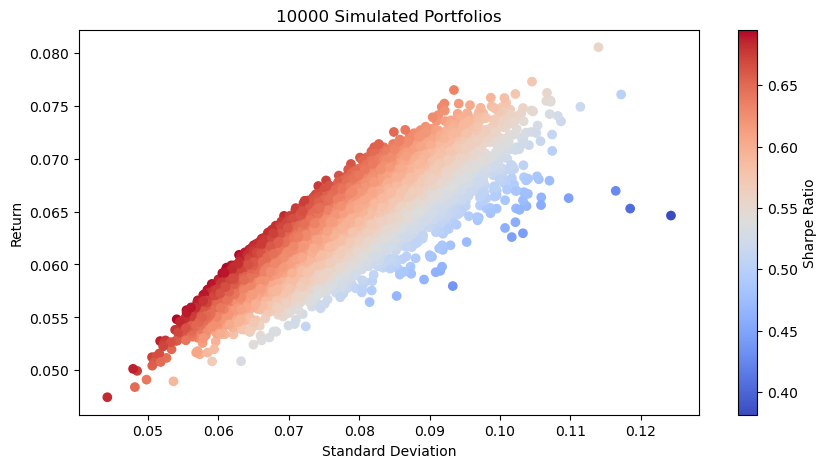

In [19]:
# visualize simulated portfolios
plt.figure(figsize = (10, 5))
plt.scatter(x=simport["std"],y=simport["ret"],c=simport["sharpe"], cmap= "coolwarm")
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('10000 Simulated Portfolios');

### Optimization algorithm 

In [20]:
# four business cylces
# the objective function to be minimized
# maximize the sharpe ratio is equivalent to minimize the negative sharpe ratio
def neg_sharpe_re(weight):
    ret=np.dot(return2_re.mean(),weight)*12
    std=np.dot(weight.T, np.dot(return2_re.cov()*12, weight))**0.5
    sharpe=(ret-rf)/std       
    return -sharpe

def neg_sharpe_in(weight):
    ret=np.dot(return2_in.mean(),weight)*12
    std=np.dot(weight.T, np.dot(return2_in.cov()*12, weight))**0.5
    sharpe=(ret-rf)/std       
    return -sharpe

def neg_sharpe_st(weight):
    ret=np.dot(return2_st.mean(),weight)*12
    std=np.dot(weight.T, np.dot(return2_st.cov()*12, weight))**0.5
    sharpe=(ret-rf)/std       
    return -sharpe

def neg_sharpe_de(weight):
    ret=np.dot(return2_de.mean(),weight)*12
    std=np.dot(weight.T, np.dot(return2_de.cov()*12, weight))**0.5
    sharpe=(ret-rf)/std       
    return -sharpe

In [21]:
# sum of the weights minus one is zero 
def sum_weight(weight):
    return np.sum(weight)-1

In [22]:
# four business cylces
# target volatility 10%
def target_vol_re(weight):
    return 0.1-np.dot(weight.T, np.dot(return2_re.cov()*12, weight))**0.5

def target_vol_in(weight):
    return 0.1-np.dot(weight.T, np.dot(return2_in.cov()*12, weight))**0.5

def target_vol_st(weight):
    return 0.1-np.dot(weight.T, np.dot(return2_st.cov()*12, weight))**0.5

def target_vol_de(weight):
    return 0.1-np.dot(weight.T, np.dot(return2_de.cov()*12, weight))**0.5

In [23]:
# target return > 60/40
def target_ret(weight):
    return np.dot(return2.mean(),weight)*12-return_ben

In [24]:
# the function sum_weight and target_vol defines the constraint
# equality constraint (eq) means that the constraint function result is to be zero 
# inequalities (ineq) constraint means that the funciton result must be non-negative
constraint_re = ({'type':'eq','fun': sum_weight},{'type':'eq','fun': target_vol_re},{'type':'ineq','fun': target_ret})
constraint_in = ({'type':'eq','fun': sum_weight},{'type':'eq','fun': target_vol_in},{'type':'ineq','fun': target_ret})
constraint_st = ({'type':'eq','fun': sum_weight},{'type':'eq','fun': target_vol_st},{'type':'ineq','fun': target_ret})
constraint_de = ({'type':'eq','fun': sum_weight},{'type':'eq','fun': target_vol_de},{'type':'ineq','fun': target_ret})

In [25]:
# lower and upper bounds 
# sequence of (min, max) pairs for each element
# (0,1) for asset class
# (0,0) for cash
# (0,0) no leverage
bound = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 0), (0, 0))

In [26]:
# initial guess of weights  
# array of 9 elements 
a1=np.array([1/9]*9)
a1

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [27]:
optimal_re=minimize(fun=neg_sharpe_re, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint_re)
optimal_in=minimize(fun=neg_sharpe_in, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint_in)
optimal_st=minimize(fun=neg_sharpe_st, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint_st)
optimal_de=minimize(fun=neg_sharpe_de, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint_de)
optimal_re
# SLSQP stands for sequential least squares programming
# SLSQP method minimizes a function of several variables with bounds and constraints
# fun is the value of objective function

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.7286087819240918
       x: [ 0.000e+00  0.000e+00  6.573e-01  3.189e-16  3.427e-01
            0.000e+00  2.767e-16  0.000e+00  0.000e+00]
     nit: 8
     jac: [-4.665e-01 -5.080e-01  1.554e-01 -3.891e-01 -8.007e-01
           -8.811e-02 -3.803e-01        nan        nan]
    nfev: 65
    njev: 8

In [28]:
# weights of the optimal portfolio in four periods
# x is the solution array 
a_re=optimal_re["x"]
a_in=optimal_in["x"]
a_st=optimal_st["x"]
a_de=optimal_de["x"]
a_de

array([1.74949626e-01, 0.00000000e+00, 1.06770197e-16, 0.00000000e+00,
       4.78200921e-17, 1.08860674e-16, 8.25050374e-01, 0.00000000e+00,
       0.00000000e+00])

In [29]:
# 12.5% reflationary 
# 12.5% inflationary 
# 25% stagflationary 
# 50% deflationary
# forward-looking
a2 = a_re*0.125+a_in*0.125+a_st*0.25+a_de*0.5
a2

array([8.74748130e-02, 1.18306169e-01, 1.50611206e-01, 5.65527387e-02,
       1.74529886e-01, 5.44303372e-17, 4.12525187e-01, 0.00000000e+00,
       0.00000000e+00])

In [30]:
# weights in a series with index values
w=pd.Series(data=a2,index=return1.columns)
round(w,2)

US Treasury Bonds                 0.09
US Inflation-Linked Bonds         0.12
Global Equity                     0.15
Commodities                       0.06
Gold                              0.17
US High Yield Bonds               0.00
Emerging Market Sovereign Debt    0.41
Cash                              0.00
LIBOR                             0.00
dtype: float64

In [31]:
# expected ret, std, and sharpe ratio of the optimal portfolio based on the whole period data
ret2,std2,sharpe2=portfolio(a2)

In [32]:
ret2

0.06947646465491455

In [33]:
std2

0.08206941218182186

In [34]:
sharpe2

0.6366762060184822

## 1.2 Back-testing

### clean the price data

In [35]:
price1.drop(pd.to_datetime("1998-12-31"),axis="index",inplace=True)

In [36]:
price1

,US Treasury Bonds,US Inflation-Linked Bonds,Global Equity,Commodities,Gold,US High Yield Bonds,Emerging Market Sovereign Debt,Cash,LIBOR
PriceDate,,,,,,,,,
1999-01-01,983.50,106.1116,92.1840,136.3798,77.5773,536.47,88.052,349.4840,5.0656
1999-01-04,982.38,105.6175,93.1440,136.9924,77.4047,536.88,89.451,349.6425,5.0603
1999-01-05,979.96,105.5680,94.0910,136.5933,77.3081,537.14,90.668,349.6979,5.0603
1999-01-06,982.35,106.3848,95.8840,138.5323,77.5296,537.63,90.909,349.7490,5.0603
1999-01-07,979.53,106.4571,95.6300,138.4324,78.5728,537.99,89.151,349.8079,5.0575
...,...,...,...,...,...,...,...,...,...
2022-12-26,2200.70,329.5350,317.7814,642.2183,427.8410,2206.64,517.100,535.4438,4.7264
2022-12-27,2187.85,328.5899,317.4097,647.0357,432.5279,2202.30,515.099,535.6728,4.7264
2022-12-28,2184.57,328.2543,314.6942,643.4645,430.8486,2186.17,515.003,535.7443,4.7298


### back-testing strategy

In [37]:
# algo to fire on the beginning of every month and to run on the first date
runMonthlyAlgo = bt.algos.RunMonthly(
    run_on_first_date=True
)

# algo to set the weights
#  it will only run when runMonthlyAlgo returns true
#  which only happens on the first of every month
weights_saa = pd.Series(a2,index = price1.columns)
weights_6040 = pd.Series([0.4,0.,0.6,0.,0.,0.,0.,0.,0.],index = price1.columns)
weighSpecifiedAlgo_saa = bt.algos.WeighSpecified(**weights_saa)
weighSpecifiedAlgo_6040 = bt.algos.WeighSpecified(**weights_6040)

# algo to rebalance the current weights to weights set by weighSpecified
#  will only run when weighSpecifiedAlgo returns true
#  which happens every time it runs
rebalAlgo = bt.algos.Rebalance()

# a strategy that rebalances monthly to specified weights
saa = bt.Strategy('SAA',
    [
        runMonthlyAlgo,
        weighSpecifiedAlgo_saa,
        rebalAlgo
    ]
)

traditional = bt.Strategy('60/40',
    [
        runMonthlyAlgo,
        weighSpecifiedAlgo_6040,
        rebalAlgo
    ]
)

In [38]:
# define backtest in bt.Backtest
backtest_saa = bt.Backtest(saa,price1)
backtest_traditional = bt.Backtest(traditional,price1)

In [39]:
# run backtests with bt.run
report_1 = bt.run(backtest_saa,backtest_traditional)

### Backtesting results

In [40]:
# SAA portfolio price
price_saa = report_1.prices['SAA']
price_saa = price_saa.iloc[np.where(price_saa.index>'1998-12-31')]
price_saa

1999-01-01    100.000000
1999-01-04    100.733845
1999-01-05    101.393596
1999-01-06    102.041415
1999-01-07    101.390032
                 ...    
2022-12-26    497.917826
2022-12-27    497.776423
2022-12-28    496.495511
2022-12-29    497.954022
2022-12-30    497.416513
Name: SAA, Length: 6252, dtype: float64

In [41]:
# pct_change(): calculate returns
return_saa=price_saa.pct_change().dropna()
return_saa

1999-01-04    0.007338
1999-01-05    0.006549
1999-01-06    0.006389
1999-01-07   -0.006384
1999-01-08   -0.004085
                ...   
2022-12-26    0.000044
2022-12-27   -0.000284
2022-12-28   -0.002573
2022-12-29    0.002938
2022-12-30   -0.001079
Name: SAA, Length: 6251, dtype: float64

In [42]:
# 60/40 portfolio price
price_6040 = report_1.prices['60/40']
price_6040 = price_6040.iloc[np.where(price_6040.index>'1998-12-31')]
price_6040

1999-01-01    100.000000
1999-01-04    100.579296
1999-01-05    101.097352
1999-01-06    102.361270
1999-01-07    102.081475
                 ...    
2022-12-26    320.967343
2022-12-27    319.979690
2022-12-28    318.163863
2022-12-29    320.888676
2022-12-30    320.125724
Name: 60/40, Length: 6252, dtype: float64

In [43]:
# pct_change(): calculate returns
return_6040=price_6040.pct_change().dropna()
return_6040

1999-01-04    0.005793
1999-01-05    0.005151
1999-01-06    0.012502
1999-01-07   -0.002733
1999-01-08   -0.002356
                ...   
2022-12-26    0.000177
2022-12-27   -0.003077
2022-12-28   -0.005675
2022-12-29    0.008564
2022-12-30   -0.002378
Name: 60/40, Length: 6251, dtype: float64

In [44]:
# SAA
# historical 1-day 95% VaR
HVaR_95_saa = return_saa.quantile(0.05)
HVaR_95_saa

-0.006013773014471868

In [45]:
# SAA
# analytical 1-day 95% VaR
# calculate VaR using point percentile function
# Assume normal distribution
mean_saa = np.mean(return_saa)
std_dev_saa = np.std(return_saa)
AVaR_95_saa = norm.ppf(0.05, mean_saa, std_dev_saa)
AVaR_95_saa

-0.006471899144954041

In [46]:
# 60/40
# historical 1-day 95% VaR
HVaR_95_6040 = return_6040.quantile(0.05)
HVaR_95_6040

-0.00863380549858267

In [47]:
# 60/40
# analytical 1-day 95% VaR
# calculate VaR using point percentile function
# Assume normal distribution
mean_6040 = np.mean(return_6040)
std_dev_6040 = np.std(return_6040)
AVaR_95_6040 = norm.ppf(0.05, mean_6040, std_dev_6040)
AVaR_95_6040

-0.009136640152538721

In [48]:
# turnover rate
turnover_saa = backtest_saa.turnover.mean()*252
turnover_6040 = backtest_traditional.turnover.mean()*252

In [49]:
rf=float(rf)

In [50]:
# set risk-free rate
report_1.set_riskfree_rate(rf)

In [51]:
statistics_saa = report_1['SAA'].stats.drop(['start','end'])
statistics_saa = statistics_saa.astype(float)
statistics_saa

rf                        0.017225
total_return              3.974165
cagr                      0.069137
max_drawdown             -0.270808
calmar                    0.255298
mtd                      -0.001213
three_month               0.070604
six_month                 0.010076
ytd                      -0.121368
one_year                 -0.120008
three_year                0.003289
five_year                 0.022153
ten_year                  0.023020
incep                     0.069137
daily_sharpe              0.764560
daily_sortino             1.179093
daily_mean                0.066789
daily_vol                 0.065019
daily_skew               -0.879043
daily_kurt               12.910398
best_day                  0.035773
worst_day                -0.043642
monthly_sharpe            0.650806
monthly_sortino           1.034999
monthly_mean              0.070436
monthly_vol               0.081969
monthly_skew             -1.316511
monthly_kurt              6.660654
best_month          

In [52]:
statistics_6040 = report_1['60/40'].stats.drop(['start','end'])
statistics_6040 = statistics_6040.astype(float)
statistics_6040

rf                        0.017225
total_return              2.201257
cagr                      0.049681
max_drawdown             -0.364585
calmar                    0.136268
mtd                      -0.025715
three_month               0.061225
six_month                 0.000095
ytd                      -0.157298
one_year                 -0.157111
three_year                0.019515
five_year                 0.035877
ten_year                  0.053092
incep                     0.049681
daily_sharpe              0.376029
daily_sortino             0.588929
daily_mean                0.050970
daily_vol                 0.090130
daily_skew               -0.388071
daily_kurt                8.112032
best_day                  0.049841
worst_day                -0.055251
monthly_sharpe            0.384978
monthly_sortino           0.617524
monthly_mean              0.052932
monthly_vol               0.093101
monthly_skew             -0.610318
monthly_kurt              1.624558
best_month          

In [53]:
# summary for SAA and 60/40 portfolio
summary_1 = pd.DataFrame({
    'Statistics' : ['Annualized Return (%)', 'Annualized Volatility (%)',  'Maximum Drawdown (%)', 'Historical VaR (1-day 95%) (%)', 
                    'Analytical VaR (1-day 95%) (%)','Best Year (%)','Worst Year (%)','Turnover (%)',
                    'Sharpe Ratio','Sortino Ratio','60/40 Correlation'],
    'SAA' : [statistics_saa[2], statistics_saa['yearly_vol'], statistics_saa['max_drawdown'], 
             HVaR_95_saa, AVaR_95_saa, statistics_saa['best_year'], statistics_saa['worst_year'], turnover_saa,
             statistics_saa['yearly_sharpe'], statistics_saa['yearly_sortino'], return_saa.corr(return_6040)],
    '60/40' : [statistics_6040[2], statistics_6040['yearly_vol'], statistics_6040['max_drawdown'], 
               HVaR_95_6040, AVaR_95_6040, statistics_6040['best_year'], statistics_6040['worst_year'], turnover_6040,
               statistics_6040['yearly_sharpe'], statistics_6040['yearly_sortino'], return_6040.corr(return_6040)],
})
summary_1 = summary_1.set_index('Statistics')
summary_1[0:8] = summary_1[0:8]*100
round(summary_1,2)

,SAA,60/40
Statistics,,
Annualized Return (%),6.91,4.97
Annualized Volatility (%),9.53,11.28
Maximum Drawdown (%),-27.08,-36.46
Historical VaR (1-day 95%) (%),-0.60,-0.86
Analytical VaR (1-day 95%) (%),-0.65,-0.91
Best Year (%),23.94,20.52
Worst Year (%),-12.14,-22.98
Turnover (%),10.46,11.04
Sharpe Ratio,0.59,0.34


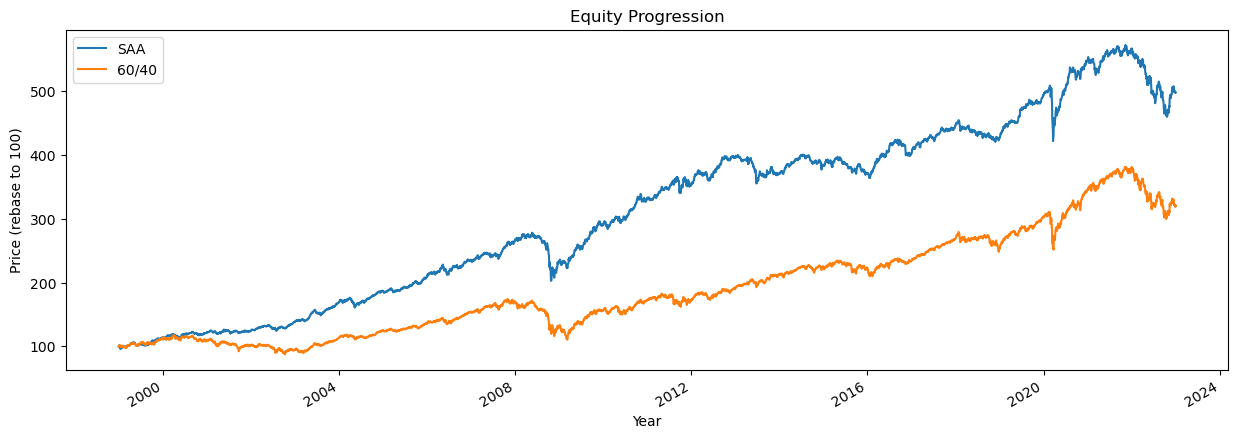

In [54]:
report_1.plot()
plt.xlabel('Year')
plt.ylabel('Price (rebase to 100)');

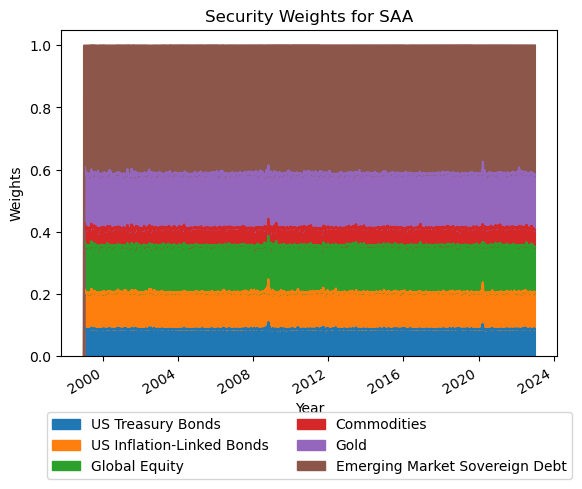

In [55]:
report_1.get_security_weights('SAA').plot.area()
plt.title("Security Weights for SAA")
plt.legend(ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.15))
plt.xlabel('Year')
plt.ylabel('Weights');

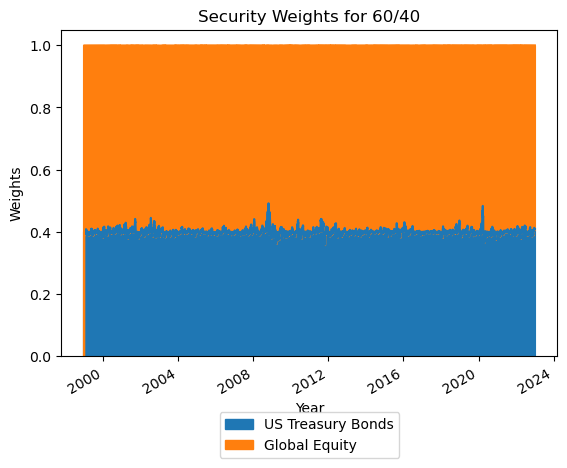

In [56]:
report_1.get_security_weights('60/40').plot.area()
plt.title("Security Weights for 60/40")
plt.legend(ncol=1,loc='upper center',bbox_to_anchor=(0.5,-0.15))
plt.xlabel('Year')
plt.ylabel('Weights');

## 2 Risk Parity Allocation

### Build and run ERC Strategy

In [57]:
# calculate the first year business days
d1 = date(1999, 1, 1)
d2 = date(2000, 1, 3)
days = np.busday_count(d1,d2)
days

261

In [58]:
# algo to fire after first year
runAfterDaysAlgo = bt.algos.RunAfterDays(
    days
)

# algo to fire on the beginning of every year and to run on the first date
runYearlyAlgo = bt.algos.RunYearly(
    run_on_first_date=True
)

selectTheseAlgo = bt.algos.SelectThese(['US Treasury Bonds','US Inflation-Linked Bonds','Global Equity','Commodities',
                                        'Gold','US High Yield Bonds','Emerging Market Sovereign Debt'])

# algo to set the weights so each asset contributes the same amount of risk
#  with data over the last 1 year
weighERCAlgo = bt.algos.WeighERC(
    lookback=pd.DateOffset(years=1),
    covar_method='standard',
    risk_parity_method='slsqp',
    maximum_iterations=100,
    tolerance=1e-8,
)

rebalAlgo = bt.algos.Rebalance()

ERC = bt.Strategy(
    'ERC',
    [
        runAfterDaysAlgo,
        runYearlyAlgo,
        selectTheseAlgo,
        weighERCAlgo,
        rebalAlgo
    ]
)

In [59]:
# define backtest in bt.Backtest
backtest_erc = bt.Backtest(
    ERC,
    price1,
    integer_positions=False
)

In [60]:
# run backtests with bt.run
report_erc = bt.run(backtest_erc)

C:\Users\USER\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
C:\Users\USER\anacon

### Backtesting results

In [61]:
# ERC portfolio price
price_erc = report_erc.prices['ERC']
price_erc = price_erc.iloc[np.where(price_erc.index>'1999-12-31')]
price_erc

2000-01-03    100.000000
2000-01-04     99.752083
2000-01-05     99.497014
2000-01-06     99.421332
2000-01-07     99.585493
                 ...    
2022-12-26    347.021402
2022-12-27    346.449116
2022-12-28    345.038986
2022-12-29    345.569503
2022-12-30    345.461854
Name: ERC, Length: 5991, dtype: float64

In [62]:
# pct_change(): calculate returns
return_erc=price_erc.pct_change().dropna()
return_erc

2000-01-04   -0.002479
2000-01-05   -0.002557
2000-01-06   -0.000761
2000-01-07    0.001651
2000-01-10    0.000396
                ...   
2022-12-26    0.000018
2022-12-27   -0.001649
2022-12-28   -0.004070
2022-12-29    0.001538
2022-12-30   -0.000312
Name: ERC, Length: 5990, dtype: float64

In [63]:
# ERC
# historical 1-day 95% VaR
HVaR_95_erc = return_erc.quantile(0.05)
HVaR_95_erc

-0.003786908731769084

In [64]:
# ERC
# analytical 1-day 95% VaR
# calculate VaR using point percentile function
# Assume normal distribution
mean_erc = np.mean(return_erc)
std_dev_erc = np.std(return_erc)
AVaR_95_erc = norm.ppf(0.05, mean_erc, std_dev_erc)
AVaR_95_erc

-0.004090953599063678

In [65]:
# turnover rate
turnover_erc = backtest_erc.turnover.mean()*252

In [66]:
report_erc.set_riskfree_rate(rf)                               # set risk-free rate
statistics_erc = report_erc['ERC'].stats.drop(['start','end'])
statistics_erc = statistics_erc.astype(float)
statistics_erc

rf                        0.017225
total_return              2.454619
cagr                      0.053018
max_drawdown             -0.198663
calmar                    0.266875
mtd                      -0.006606
three_month               0.043310
six_month                 0.004528
ytd                      -0.113349
one_year                 -0.112794
three_year                0.001509
five_year                 0.017155
ten_year                  0.020821
incep                     0.053018
daily_sharpe              0.829748
daily_sortino             1.251461
daily_mean                0.050801
daily_vol                 0.040642
daily_skew               -1.190135
daily_kurt               15.782360
best_day                  0.019580
worst_day                -0.031200
monthly_sharpe            0.623150
monthly_sortino           0.944979
monthly_mean              0.053493
monthly_vol               0.058417
monthly_skew             -1.639338
monthly_kurt              9.160904
best_month          

In [67]:
# summary for risk parity portfolio
summary_2 = pd.DataFrame({
    'Statistics' : ['Annualized Return (%)', 'Annualized Volatility (%)',  'Maximum Drawdown (%)', 'Historical VaR (1-day 95%) (%)', 
                    'Analytical VaR (1-day 95%) (%)','Best Year (%)','Worst Year (%)','Turnover (%)',
                    'Sharpe Ratio','Sortino Ratio','60/40 Correlation'],
    'ERC' : [statistics_erc[2], statistics_erc['yearly_vol'], statistics_erc['max_drawdown'], 
             HVaR_95_erc, AVaR_95_erc, statistics_erc['best_year'], statistics_erc['worst_year'], turnover_erc,
             statistics_erc['yearly_sharpe'], statistics_erc['yearly_sortino'], return_erc.corr(return_6040)]
})
summary_2 = summary_2.set_index('Statistics')
summary_2[0:8] = summary_2[0:8]*100
round(summary_2,2)

,ERC
Statistics,
Annualized Return (%),5.30
Annualized Volatility (%),7.41
Maximum Drawdown (%),-19.87
Historical VaR (1-day 95%) (%),-0.38
Analytical VaR (1-day 95%) (%),-0.41
Best Year (%),17.72
Worst Year (%),-11.33
Turnover (%),11.09
Sharpe Ratio,0.52


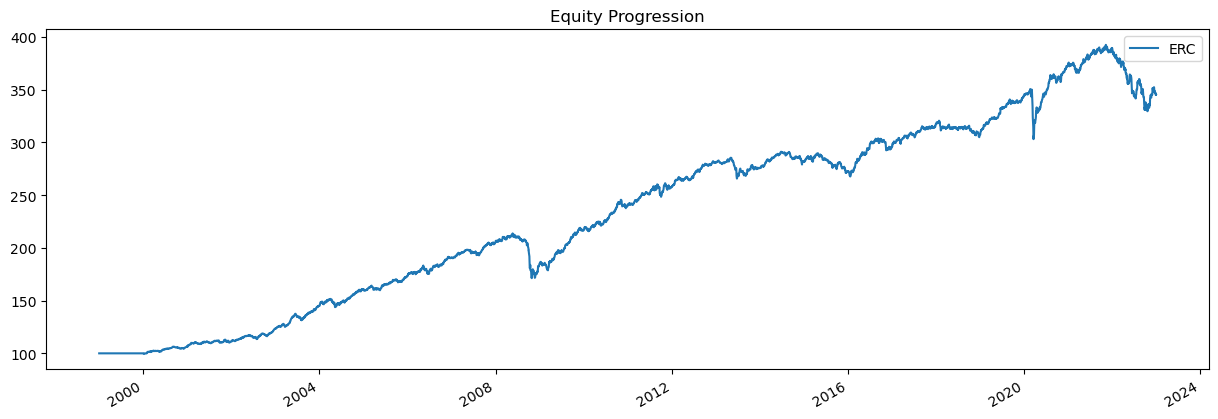

In [68]:
# plot the price series of the back-test
report_erc.plot();

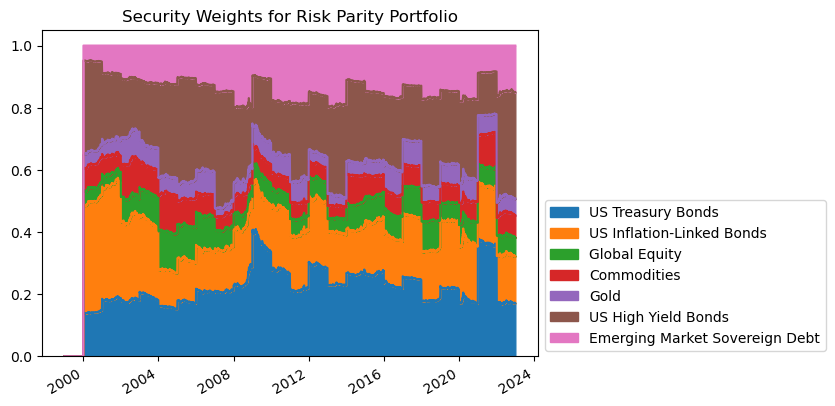

In [69]:
report_erc.get_security_weights().plot.area()
plt.title("Security Weights for Risk Parity Portfolio")
plt.legend(ncol=1,bbox_to_anchor=(1,0.5));

In [70]:
weights_target = report_erc.get_security_weights().copy()
rolling_cov_target = price1.loc[:,weights_target.columns].pct_change().rolling(window=days).cov()*252

In [71]:
# create a dataframe for risk contribution
trc_target = pd.DataFrame(
    np.nan,
    index = weights_target.index,
    columns = weights_target.columns
)

In [72]:
# calculate the risk contribution for each asset
# asset's marginal contribution = mmult(cov,weight)/std
# asset's attribution = marginal contribution * weight
for dt in price1.index:
    trc_target.loc[dt,:] = weights_target.loc[dt,:].values*(rolling_cov_target.loc[dt,:].values@weights_target.loc[dt,:].values)/np.sqrt(weights_target.loc[dt,:].values@rolling_cov_target.loc[dt,:].values@weights_target.loc[dt,:].values)

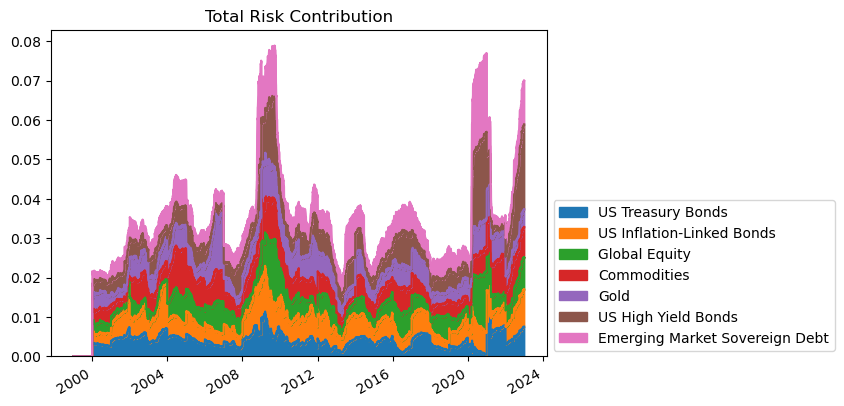

In [73]:
# risk contribution series plot
trc_target.plot.area()
plt.title("Total Risk Contribution")
plt.legend(ncol=1,bbox_to_anchor=(1,0.5));

## Appendix

In [74]:
# all statistics summary for SAA and 60/40 portfolio
report_1.display()

Stat                 SAA         60/40
-------------------  ----------  ----------
Start                1998-12-31  1998-12-31
End                  2022-12-30  2022-12-30
Risk-free rate       1.72%       1.72%

Total Return         397.42%     220.13%
Daily Sharpe         0.76        0.38
Daily Sortino        1.18        0.59
CAGR                 6.91%       4.97%
Max Drawdown         -27.08%     -36.46%
Calmar Ratio         0.26        0.14

MTD                  -0.12%      -2.57%
3m                   7.06%       6.12%
6m                   1.01%       0.01%
YTD                  -12.14%     -15.73%
1Y                   -12.00%     -15.71%
3Y (ann.)            0.33%       1.95%
5Y (ann.)            2.22%       3.59%
10Y (ann.)           2.30%       5.31%
Since Incep. (ann.)  6.91%       4.97%

Daily Sharpe         0.76        0.38
Daily Sortino        1.18        0.59
Daily Mean (ann.)    6.68%       5.10%
Daily Vol (ann.)     6.50%       9.01%
Daily Skew           -0.88       -0.39
Dai

In [75]:
# all statistics summary for risk parity portfolio
report_erc.display()

Stat                 ERC
-------------------  ----------
Start                1998-12-31
End                  2022-12-30
Risk-free rate       1.72%

Total Return         245.46%
Daily Sharpe         0.83
Daily Sortino        1.25
CAGR                 5.30%
Max Drawdown         -19.87%
Calmar Ratio         0.27

MTD                  -0.66%
3m                   4.33%
6m                   0.45%
YTD                  -11.33%
1Y                   -11.28%
3Y (ann.)            0.15%
5Y (ann.)            1.72%
10Y (ann.)           2.08%
Since Incep. (ann.)  5.30%

Daily Sharpe         0.83
Daily Sortino        1.25
Daily Mean (ann.)    5.08%
Daily Vol (ann.)     4.06%
Daily Skew           -1.19
Daily Kurt           15.78
Best Day             1.96%
Worst Day            -3.12%

Monthly Sharpe       0.62
Monthly Sortino      0.94
Monthly Mean (ann.)  5.35%
Monthly Vol (ann.)   5.84%
Monthly Skew         -1.64
Monthly Kurt         9.16
Best Month           5.43%
Worst Month          -11.23%

Yearly